In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/NLMH_OnkiemTra/Chap2_Classification_K-NearestNeighbors/weight.csv')
df

,ID,Height,Age,Weight
0,1,5.00,45,77
1,2,5.11,26,47
2,3,5.60,30,55
3,4,5.90,34,59
4,5,4.80,40,72
5,6,5.80,36,60
6,7,5.30,19,40
7,8,5.80,28,60
8,9,5.50,23,45
9,10,5.60,32,58


In [4]:
data_train = df.iloc[:-1,:]
data_train

,ID,Height,Age,Weight
0,1,5.00,45,77
1,2,5.11,26,47
2,3,5.60,30,55
3,4,5.90,34,59
4,5,4.80,40,72
5,6,5.80,36,60
6,7,5.30,19,40
7,8,5.80,28,60
8,9,5.50,23,45
9,10,5.60,32,58


In [5]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_train[['Height', 'Age']])

In [13]:
# Tách dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data_train['Weight'], test_size=0.30, random_state=42)

In [14]:
# Khởi tạo mô hình KNN với K = 3 và p = 2 (distance metric = Euclidean)
knn = KNeighborsClassifier(n_neighbors=3, p=2)

In [15]:
# Huấn luyện mô hình
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Dự đoán trên tập test
y_pred = knn.predict(X_test)

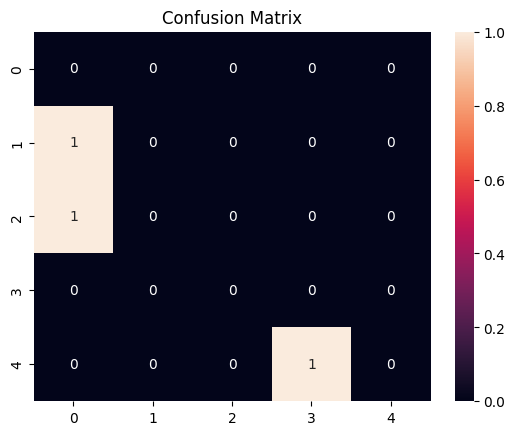

In [19]:
# In ra confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix bằng seaborn
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# In ra các chỉ số đánh giá mô hình
print('Classification Report:\n', classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

          40       0.00      1.00      0.00       0.0
          45       1.00      0.00      0.00       1.0
          47       1.00      0.00      0.00       1.0
          55       0.00      1.00      0.00       0.0
          60       1.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.60      0.40      0.00       3.0
weighted avg       1.00      0.00      0.00       3.0



In [23]:
np.isnan(X_train).any()
np.isnan(y_train).any()

TypeError: ignored

In [24]:
print(X_train.dtype)
print(y_train.dtype)

float64
object


In [27]:
y_train = y_train.astype(float)
y_train

0    77.0
7    60.0
2    55.0
9    58.0
4    72.0
3    59.0
6    40.0
Name: Weight, dtype: float64

In [28]:
print(np.isnan(y_train).any())


False


TypeError: ignored

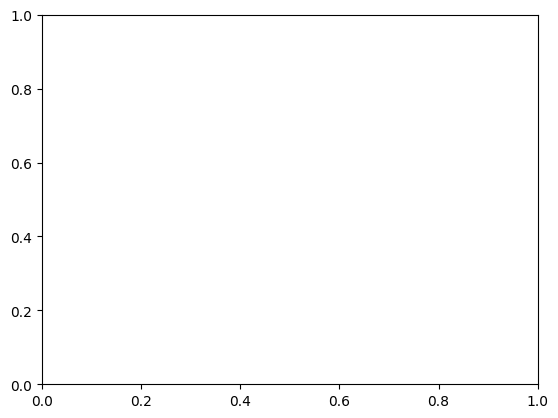

In [26]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to visualize the results
def visualize_results(X_set, y_set, set_description):
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('K-NN (%s set)' % set_description)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Visualize the Training set results
visualize_results(X_train, y_train, 'Training')

# Visualize the Test set results
visualize_results(X_test, y_test, 'Test')